#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 6 Manifold (Kernel PCA) Alumno: Ibarra Ramírez Sergio </font>

Ejemplo de Kernel PCA con RBF o Gaussiano

In [28]:
import matplotlib 
import scipy 
from scipy.spatial.distance import pdist, squareform 
from scipy.linalg import eigh
import numpy as np
import matplotlib.pyplot as plt


Se define la función que aplica el Kernel PCA 

In [43]:
def rbf_kpca (X, gamma, n_components):
    ##1. CREACIÓN DE LA MATRIZ DE DISTANCIA O DE NUCLEOS

    ##Se calculan las distancias cuadraticas entre todas las parejas de puntos
    ## Obtenemos una lista de distancias
    sq_dists = pdist(X,'sqeuclidean') 
    ## Convertimos la lista a una matriz de distancias
    mat_sq_dists = squareform(sq_dists)
    ## Vamos a aplicar la exponencial para obtener la lalamda matriz de nueclos K 
    ## K es entonces la matriz nxn de distancias
    K = np.exp(-gamma * mat_sq_dists)


    ##2. Centrar la Matriz K de nucleos 
    N = K.shape[0]
    ## Esta es la que se llama 1n 
    one_n = np.ones((N,N)) /N 
    ## Ahora si aplicamos como tal el centrado de la matriz K 
    K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)


    ## 3. Obtenemos los eigenvectores y valores de la matriz centrada
    eigenvals, eigenvecs = eigh(K) ## Devuelve los eigenvecs en forma ascendente
    ## Se 'invierten los eigenvecs' para obtenerr solos k primeros (que serian los Princpal Components variables)
    eigenvals, egenvecs = eigenvals[::-1], eigenvecs[:,::-1]

    ##Eigenvectors
    alphas = np.column_stack([eigenvecs[:,i] for i in range(n_components)]) 

    ##Eigenvalues
    lamdas = np.column_stack([eigenvals[i] for i in range(n_components)]) 
    return alphas, lamdas

Importamos el conjunto NO LINEALMENTE SEPARABLE DE make_moons

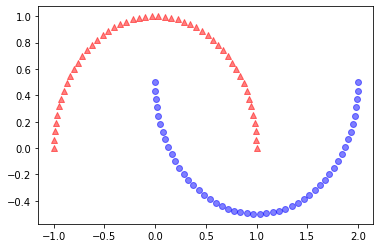

In [31]:
## Generador de medias lunas 
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, random_state=123)

#Todos los x cuyo valor de y seea cero 0 uno y la prieimer y segunda columna de eso 
plt.scatter(X[y==0,0], X[y==0,1], color='red', marker='^', alpha =0.5)

plt.scatter(X[y==1,0], X[y==1,1], color='blue', marker='o', alpha =0.5)

##### Vamos a aplicar el 'PCA NORMAL' al conjunto make_moons

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca_normal = pca.fit_transform(X)
X_pca_normal

array([[-0.2795509 ,  0.34303617],
       [-0.42251533, -0.6083743 ],
       [-1.11143524, -0.31056455],
       [ 0.91009606,  0.4682757 ],
       [ 0.01356142, -0.5194961 ],
       [-0.55258909, -0.08452989],
       [-0.40741947,  0.19974865],
       [ 0.55258909,  0.08452989],
       [-1.0649998 , -0.3547569 ],
       [-0.44363426,  0.14685533],
       [ 0.61319152,  0.58547722],
       [-0.106304  , -0.5647979 ],
       [-0.79597451, -0.52655299],
       [ 0.1800669 , -0.42380069],
       [ 0.67533755,  0.56975829],
       [ 1.38981501, -0.25483572],
       [-0.8539697 , -0.49924418],
       [ 1.32278775, -0.00802077],
       [ 0.36789019, -0.250213  ],
       [-0.73634878, -0.55008994],
       [ 1.23247827,  0.16146635],
       [-1.32278775,  0.00802077],
       [ 0.35841461,  0.60781552],
       [ 0.96412295,  0.43377483],
       [ 1.0649998 ,  0.3547569 ],
       [-1.37903292,  0.19164584],
       [-1.23247827, -0.16146635],
       [-0.23110388,  0.38501356],
       [ 0.47638576,

Se muestra como el PCA NO ES LINEALMENTE SEPARABLE 

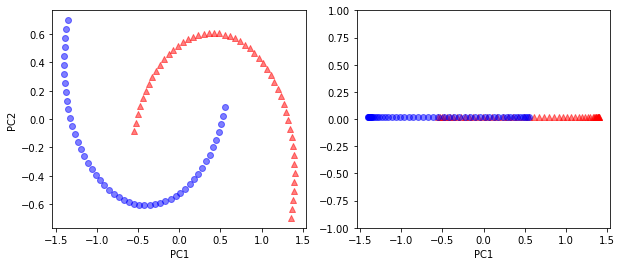

In [33]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_normal[y==0,0], X_pca_normal[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_normal[y==1,0], X_pca_normal[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_normal[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_normal[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

Ahora si vamos a aplicar el Kernel PCA que habiamos cosntruido anteriormente

In [44]:
## La X_pca_K almacena las alfas, y la l las lamdas 
X_pca_K,l = rbf_kpca(X, gamma=15, n_components=2)
X_pca_K

array([[ 7.54499940e-19,  0.00000000e+00],
       [-1.30291290e-16,  2.66289402e-16],
       [ 1.26953693e-16, -3.05004458e-15],
       [-8.58105306e-17,  1.42203789e-15],
       [ 2.81529628e-17, -8.42502646e-16],
       [ 5.67960542e-16,  1.71997372e-15],
       [-2.48535577e-16,  9.29689321e-18],
       [-4.15640734e-18,  5.96065415e-16],
       [-4.05752302e-18,  1.24084454e-16],
       [-3.40700172e-18,  9.86054911e-17],
       [-3.34437421e-18,  9.81347035e-17],
       [-3.05760061e-18,  7.76874910e-17],
       [-3.32066991e-18,  7.92981091e-17],
       [-3.38316551e-18,  8.10351836e-17],
       [-3.83024014e-18,  7.83594196e-17],
       [-3.05998404e-06, -8.77064471e-05],
       [-3.49269752e-18,  1.13469282e-16],
       [-3.30868547e-11, -1.90462085e-09],
       [-2.81988217e-18,  1.14891226e-16],
       [-2.81896234e-18,  1.17520416e-16],
       [-1.30089797e-15, -1.10976982e-13],
       [ 3.30868526e-11,  1.90462095e-09],
       [-4.25354497e-18,  1.16666806e-16],
       [-4.

Se grafica el resultado de X_pca_K

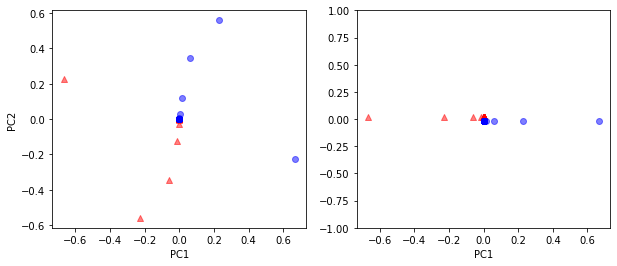

In [45]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_K[y==0,0], X_pca_K[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_K[y==1,0], X_pca_K[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_K[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_K[y==1,0], np.zeros((50,1)) -0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

Vamos a variar el valor de gamma 

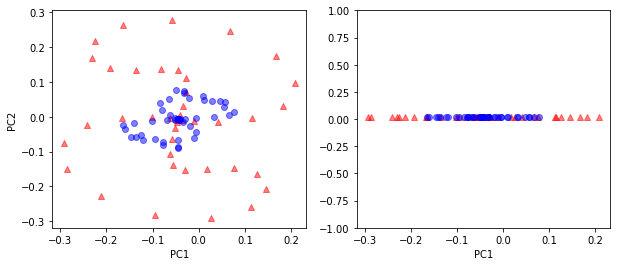

In [36]:
X_pca_K,l = rbf_kpca(X, gamma=10, n_components=2)
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_pca_K[y==0,0], X_pca_K[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_pca_K[y==1,0], X_pca_K[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_pca_K[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca_K[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()

#### Ejemplo de implementacion de Manifold con linrerias de sk.learn 

Importamos los datos 

In [ ]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100, random_state=123)

Creamos y entrenamos el modelo PCA Manifold de sklearn

In [37]:
## Con PCA Manifold de sklearn 

from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)
X_kpca = kpca.fit_transform(X) 
X_kpca

array([[-0.19813012, -0.32893502],
       [ 0.35038479, -0.18363537],
       [ 0.33278344,  0.27303406],
       [-0.35861834,  0.13787481],
       [ 0.27947114, -0.34646117],
       [-0.03231269, -0.09992664],
       [-0.1402958 , -0.26393352],
       [ 0.03231269, -0.09992664],
       [ 0.34107928,  0.24384492],
       [-0.11997571, -0.23460267],
       [-0.36284598, -0.06785758],
       [ 0.30536789, -0.32022674],
       [ 0.36407185,  0.05708143],
       [ 0.23323782, -0.35027498],
       [-0.36450698, -0.02649036],
       [-0.19110122,  0.31758295],
       [ 0.3619725 ,  0.09811911],
       [-0.25930323,  0.35789694],
       [ 0.16016551, -0.28967584],
       [ 0.36491625,  0.01534889],
       [-0.30089306,  0.33640228],
       [ 0.25930323,  0.35789694],
       [-0.34376065, -0.21775298],
       [-0.35401236,  0.17577444],
       [-0.34107928,  0.24384492],
       [ 0.20934501,  0.33483988],
       [ 0.30089306,  0.33640228],
       [-0.21607303, -0.34193845],
       [ 0.09932993,

Graficamos el reusltado del PCA Kernel del sklearn

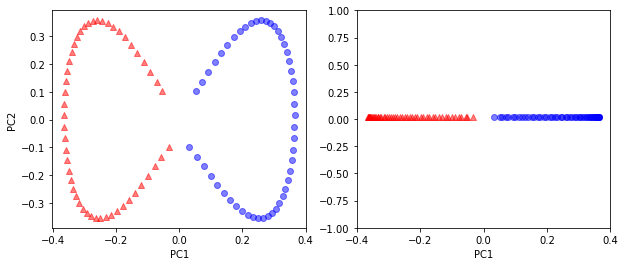

In [38]:
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ax[0].scatter(X_kpca[y==0,0], X_kpca[y==0,1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X_kpca[y==1,0], X_kpca[y==1,1], color='blue', marker='o', alpha =0.5)
ax[1].scatter(X_kpca[y==0,0], np.zeros((50,1)) +0.02, color='red', marker='^', alpha=0.5)
ax[1].scatter(X_kpca[y==1,0], np.zeros((50,1)) +0.02, color='blue', marker='o', alpha=0.5)
ax[1].set_ylim([-1,1])
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_xlabel('PC1')
plt.show()